## Transformer

Transformers only reads in the following formats:

1. txt
2. csv
3. tsv
4. jsonl
5. json
6. xml

[Source](https://huggingface.co/docs/datasets/dataset_script.html)

If you want to read in pdf files, you would have to convert it to any of the format above.

for our notebook we would be converting them to pdf.

In [7]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

In [8]:
output_string = StringIO()
with open("summary text.pdf" , "rb") as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device =  TextConverter(rsrcmgr, output_string, laparams= LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)
        #print('*' * 100)
        
print(output_string.getvalue())

New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester
County, New York.
A year later, she got married again in Westchester County, but to a different man and without
divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five
more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license,
she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the
first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her
attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos 

In [9]:
#from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [10]:
text = output_string.getvalue()

str

In [11]:
text = text[:-4]

In [12]:
dataset = text.replace('\n', ' ').replace('\\', '').replace('\n\n', '').replace('\x0c','')

In [21]:
n =512
bank = [dataset[i:i+n] for i in range(0, len(dataset), n)]

In [14]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")

In [15]:
tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [32]:
summary = []
for dataset in bank:
    inputs = tokenizer("summarize: " + dataset, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary.append(tokenizer.decode(outputs[0]))
    #print(tokenizer.decode(outputs[0]))
    
result  = "".join(summary)
result = result.replace(r'<pad>','').replace(r'</s>','')

print(result)

<pad> liana barrientos got married in the westchester county, new york, in 2010. she got married again in the westchester county, but to a different man. in 2010, she married once more, this time in the Bronx.</s><pad> barrientos is accused of "offering a false instrument for filing in the first degree" she pleaded not guilty to two counts of "offering a false instrument for filing in the first degree" the marriages were part of an immigration scam, she says.</s><pad> in total, barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002. she is believed to still be married to four men, and at one time, she was married to eight men at once.</s><pad> the case was referred to the Bronx District Attorney's Office. seven of the men are from so-called "red-flagged" countries. it is unclear whether any of the men will be prosecuted.</s><pad> barrientos faces up to four years in prison if convicted. her eighth husband, Rashid Rajput, was deported to his nat

### Trying out new model

In [33]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

In [34]:
tokenizer = AutoTokenizer.from_pretrained("t5-small")

In [35]:
summary = []
for dataset in bank:
    inputs = tokenizer("summarize: " + dataset, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary.append(tokenizer.decode(outputs[0]))
    #print(tokenizer.decode(outputs[0]))
    
result  = "".join(summary)
result = result.replace(r'<pad>','').replace(r'</s>','')

print(result)

 a year later, she got married again in westchester county, new york. only 18 days after that marriage, she got hitched yet again. in 2010, she married once more, this time in the Bronx. barrientos, now 39, is facing two criminal counts of "offering a false instrument" referring to her false statements on the 2010 marriage license application. the marriages were part of an immigration scam, her attorney says. in total, barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002. she is believed to still be married to four men, and at one time, she was married to eight men at once. seven of the men are from so-called "red-flagged" countries. seven of the men are from so-called "red-flagged" countries. the case was referred to the district attorney's office. if convicted, barrientos faces up to four years in prison. if convicted, barrientos faces up to four years in prison. next court appearance is scheduled for may 18.


##  The two other models below are very large, the aim is to show how large each model is .

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-3b")
tokenizer = AutoTokenizer.from_pretrained("t5-3b")

inputs = tokenizer("summarize: " + dataset, return_tensors="pt", max_length=512, truncation=True)
#inputs

outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True
)

print(tokenizer.decode(outputs[0]))

result = tokenizer.decode(outputs[0])[6:-4]
result

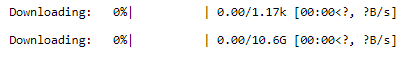

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-11b")
tokenizer = AutoTokenizer.from_pretrained("t5-11b")

inputs = tokenizer("summarize: " + dataset, return_tensors="pt", max_length=512, truncation=True)
#inputs

outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True
)

print(tokenizer.decode(outputs[0]))

result = tokenizer.decode(outputs[0])[6:-4]
result

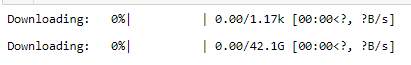

### Reading in Multiple CSV files

Dataset was gotten from kaggle [here](https://www.kaggle.com/gauravduttakiit/headline-text-summarization-using-transformer/data) 

In [1]:
import pandas as pd
pd.set_option('max_colwidth', -1)
news=pd.read_excel('Inshorts Cleaned Data.xlsx')

C:\Users\babba\AppData\Local\Temp/ipykernel_14124/3873755600.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [4]:
news.head()

,Headline,Short,Source,Time,Publish Date
0,4 ex-bank officials booked for cheating bank of ₹209 crore,"The CBI on Saturday booked four former officials of Syndicate Bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. The accused had availed home loans and credit from Syndicate Bank on the basis of forged and fabricated documents. These funds were fraudulently transferred to the companies owned by the accused persons.",The New Indian Express,09:25:00,2017-03-26
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme Court will go paperless in six to seven months in a bid to save funds and make the judiciary eco-friendly. He further said the apex court will collect all the records electronically from the lower courts and the high courts so that there is no need to file hard copies.,Outlook,22:18:00,2017-03-25
2,"At least 3 killed, 30 injured in blast in Sylhet, Bangladesh","At least three people were killed, including a policeman, while 30 others were wounded on Saturday evening in two explosions in Sylhet, Bangladesh. The explosions were targetted at people and police officials who were witnessing an over 30-hour-long gunfight between extremists and commandos. Earlier on Friday, a man had blown himself up in front of a checkpoint near Dhaka Airport.",Hindustan Times,23:39:00,2017-03-25
3,Why has Reliance been barred from trading in futures?,"Mukesh Ambani-led Reliance Industries (RIL) was barred from trading in futures market for a year over stake sale in Reliance Petroleum (RPL). In 2007, RIL sold 4.1% stake in RPL, but shares were first &#39;short-sold&#39; in futures market to avoid a fall in RPL stocks. Short sale means selling shares with plans to buy them back later at lower prices.",Livemint,23:08:00,2017-03-25
4,Was stopped from entering my own studio at Times Now: Arnab,"TV news anchor Arnab Goswami has said he was told he could not do the programme two days before leaving Times Now. &#34;18th November was my last day, I was not allowed to enter my own studio,&#34; Goswami added. &#34;When you build an institution and are not allowed to enter your own studio, you feel sad,&#34; the journalist further said.",YouTube,23:24:00,2017-03-25


In [10]:
news = news[['Headline', 'Short']]
news.head()

,Headline,Short
0,4 ex-bank officials booked for cheating bank of ₹209 crore,"The CBI on Saturday booked four former officials of Syndicate Bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. The accused had availed home loans and credit from Syndicate Bank on the basis of forged and fabricated documents. These funds were fraudulently transferred to the companies owned by the accused persons."
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme Court will go paperless in six to seven months in a bid to save funds and make the judiciary eco-friendly. He further said the apex court will collect all the records electronically from the lower courts and the high courts so that there is no need to file hard copies.
2,"At least 3 killed, 30 injured in blast in Sylhet, Bangladesh","At least three people were killed, including a policeman, while 30 others were wounded on Saturday evening in two explosions in Sylhet, Bangladesh. The explosions were targetted at people and police officials who were witnessing an over 30-hour-long gunfight between extremists and commandos. Earlier on Friday, a man had blown himself up in front of a checkpoint near Dhaka Airport."
3,Why has Reliance been barred from trading in futures?,"Mukesh Ambani-led Reliance Industries (RIL) was barred from trading in futures market for a year over stake sale in Reliance Petroleum (RPL). In 2007, RIL sold 4.1% stake in RPL, but shares were first ;short-sold; in futures market to avoid a fall in RPL stocks. Short sale means selling shares with plans to buy them back later at lower prices."
4,Was stopped from entering my own studio at Times Now: Arnab,"TV news anchor Arnab Goswami has said he was told he could not do the programme two days before leaving Times Now. 18th November was my last day, I was not allowed to enter my own studio, Goswami added. When you build an institution and are not allowed to enter your own studio, you feel sad, the journalist further said."


#### From the table above you would see different html character code which needs to be cleaned, you can check out other codes [here.](https://www.w3.org/MarkUp/html-spec/html-spec_13.html)

In [8]:
news=news.replace(r'&#45','-', regex=True).replace(r'&#39','', regex=True).replace(r'&amp','and', regex=True).replace(r'&#34;','', regex=True)
news.head()

,Headline,Short
0,4 ex-bank officials booked for cheating bank of ₹209 crore,"The CBI on Saturday booked four former officials of Syndicate Bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. The accused had availed home loans and credit from Syndicate Bank on the basis of forged and fabricated documents. These funds were fraudulently transferred to the companies owned by the accused persons."
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme Court will go paperless in six to seven months in a bid to save funds and make the judiciary eco-friendly. He further said the apex court will collect all the records electronically from the lower courts and the high courts so that there is no need to file hard copies.
2,"At least 3 killed, 30 injured in blast in Sylhet, Bangladesh","At least three people were killed, including a policeman, while 30 others were wounded on Saturday evening in two explosions in Sylhet, Bangladesh. The explosions were targetted at people and police officials who were witnessing an over 30-hour-long gunfight between extremists and commandos. Earlier on Friday, a man had blown himself up in front of a checkpoint near Dhaka Airport."
3,Why has Reliance been barred from trading in futures?,"Mukesh Ambani-led Reliance Industries (RIL) was barred from trading in futures market for a year over stake sale in Reliance Petroleum (RPL). In 2007, RIL sold 4.1% stake in RPL, but shares were first ;short-sold; in futures market to avoid a fall in RPL stocks. Short sale means selling shares with plans to buy them back later at lower prices."
4,Was stopped from entering my own studio at Times Now: Arnab,"TV news anchor Arnab Goswami has said he was told he could not do the programme two days before leaving Times Now. 18th November was my last day, I was not allowed to enter my own studio, Goswami added. When you build an institution and are not allowed to enter your own studio, you feel sad, the journalist further said."


In [9]:
news.shape

(55104, 2)

In [11]:
news=news.sample(n=100)
news.reset_index(inplace = True,drop = True)
news.head()

,Headline,Short
0,5 nations; envoys present credentials to Prez Mukherjee,"Envoys of Finland, Switzerland, Guatemala, Argentina, and Sri Lanka presented their credentials to President Pranab Mukherjee at a ceremony in Delhi on Monday. The envoys were Nina Vaskunlahti, Ambassador of Finland, Andreas Baum, Ambassador of Switzerland, Giovanni Castillo, Ambassador of Guatemala, Maria Cristina Ueltschi, Argentina, and Chitraganee Wagisewara, High Commissioner of Sri Lanka."
1,;World;s steepest street; is in New Zealand,"The Baldwin Street in Dunedin, New Zealand, spanning 350 metres, is known as the world;s steepest residential street. Along the length, the street ranges from 30 metres to 100 metres above sea level, with the elevation rising by 1 metre for every 2.86 metres. The steepness is caused as streets were laid out in grids without consideration of the terrain."
2,Gujarat reach Ranji final for 1st time since 1950-51 season,Gujarat defeated Jharkhand by 123 runs to reach Ranji Trophy final for the first time since 1950-51 Ranji season. Gujarat won the Syed Mushtaq Ali Trophy in 2015 and claimed the Vijay Hazare Trophy in 2016. Gujarat will face the winner of the second semifinal between Tamil Nadu and Mumbai in the tournament;s final beginning January 10.
3,Note ban most disruptive policy since 1991: ex-RBI Governor,Former RBI Governor D Subbarao on Thursday termed demonetisation as creative destruction and the most disruptive policy innovation since 1991 reforms that has helped destroy black money. Subbarao further said that the demonetisation decision is arguably leading to a flurry of innovations in the Indian financial sector by way of digitisation of payments.
4,Unified Payments Interface launched for 21 banks,The National Payments Corporation of India (NPCI) said on Thursday that the Unified Payments Interface (UPI) is now active and available for customers of 21 banks. The UPI is a payment interface that will facilitate users to initiate payment requests directly from a smartphone. The interface was soft-launched in April and was under pilot run to fix technical glitches.


In [12]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [13]:
from transformers import pipeline
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, framework="pt")

In [14]:
l = []
for i in range(len(news['Short'])):
    l.append(summarizer(news['Short'][i], min_length=10, max_length=30))

In [21]:
news.loc[:, 'News Summary'] = l
news['News Summary']=news['News Summary'].astype('string')

news['News Summary']=news['News Summary'].str[18:]
news['News Summary']=news['News Summary'].str[:-2]

news.head()

,Headline,Short,News Summary
0,5 nations; envoys present credentials to Prez Mukherjee,"Envoys of Finland, Switzerland, Guatemala, Argentina, and Sri Lanka presented their credentials to President Pranab Mukherjee at a ceremony in Delhi on Monday. The envoys were Nina Vaskunlahti, Ambassador of Finland, Andreas Baum, Ambassador of Switzerland, Giovanni Castillo, Ambassador of Guatemala, Maria Cristina Ueltschi, Argentina, and Chitraganee Wagisewara, High Commissioner of Sri Lanka.","envoys of Finland, Switzerland, Guatemala, Argentina, and Sri Lanka present credentials . a ceremony was held in new Delhi on"
1,;World;s steepest street; is in New Zealand,"The Baldwin Street in Dunedin, New Zealand, spanning 350 metres, is known as the world;s steepest residential street. Along the length, the street ranges from 30 metres to 100 metres above sea level, with the elevation rising by 1 metre for every 2.86 metres. The steepness is caused as streets were laid out in grids without consideration of the terrain.","the Baldwin Street in Dunedin, new Zealand, spanning 350 metres, is known as the world's steepest residential street ."
2,Gujarat reach Ranji final for 1st time since 1950-51 season,Gujarat defeated Jharkhand by 123 runs to reach Ranji Trophy final for the first time since 1950-51 Ranji season. Gujarat won the Syed Mushtaq Ali Trophy in 2015 and claimed the Vijay Hazare Trophy in 2016. Gujarat will face the winner of the second semifinal between Tamil Nadu and Mumbai in the tournament;s final beginning January 10.,Gujarat defeated Jharkhand by 123 runs to reach final for the first time since 1950-51 . the winner of the second semifinal
3,Note ban most disruptive policy since 1991: ex-RBI Governor,Former RBI Governor D Subbarao on Thursday termed demonetisation as creative destruction and the most disruptive policy innovation since 1991 reforms that has helped destroy black money. Subbarao further said that the demonetisation decision is arguably leading to a flurry of innovations in the Indian financial sector by way of digitisation of payments.,former RBI Governor D Subbarao termed demonetisation as creative destruction . he said it is the most disruptive policy innovation since
4,Unified Payments Interface launched for 21 banks,The National Payments Corporation of India (NPCI) said on Thursday that the Unified Payments Interface (UPI) is now active and available for customers of 21 banks. The UPI is a payment interface that will facilitate users to initiate payment requests directly from a smartphone. The interface was soft-launched in April and was under pilot run to fix technical glitches.,the unified payments interface (UPI) is now available for customers of 21 banks . the interface was soft-launched in
